In [2]:
from modules.training_and_fine_tuning.training.train_cnn_model_using_feature_statistics import CnnModelUsingFeatureStatistics
from modules.training_and_fine_tuning.utils.feature_statistics_data_utils import DataUtils
from config.eng_config import Config
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
import pickle
from modules.training_and_fine_tuning.utils.model_utils import ModelUtilities

# Chuẩn bị mô hình

In [3]:
def train_and_evaluate_model(n_mfcc, Config, CnnModelUsingFeatureStatistics, patience_early_stop, patience_lr_reduction, batch_size, learning_rate, case, key = None):
    train_file_path, test_file_path, val_file_path = DataUtils.get_n_mfcc_paths(n_mfcc, Config)
    
    if key is None:
        x_traincnn, y_train, x_valcnn, y_val, scaler = DataUtils.prepare_data_for_train_model(train_file_path, val_file_path)
    else:
        x_traincnn, y_train, x_valcnn, y_val, scaler = DataUtils.prepare_data_for_train_model(train_file_path, val_file_path, key)

    with open(f'models/scaler_{case}.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    model = CnnModelUsingFeatureStatistics((x_traincnn.shape[1], 1), 7)

    history = model.train_model(
        x_traincnn, y_train, x_valcnn, y_val,
        f'models/best_model_{case}',
        patience_early_stop=patience_early_stop, patience_lr_reduction=patience_lr_reduction, factor=0.5, epochs=50,
        batch_size=batch_size, learning_rate=learning_rate
    )

    # Load model tốt nhất
    model = load_model(f'models/best_model_{case}.keras')
    _, val_accuracy = model.evaluate(x_valcnn, y_val)
    print(val_accuracy)

    # Vẽ ma trận nhầm lẫn
    history_dict = history.history
    ModelUtilities.plot_training_history(history_dict)
    ModelUtilities.plot_confusion_matrix(model, x_valcnn, y_val, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])
    ModelUtilities.plot_confusion_matrix_normalized(model, x_valcnn, y_val, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])

    return history, model

# Thử nghiệm trường hợp 1: chỉ MFCC

**1.1. Với n_mfcc = 13**

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2024-06-22 11:10:30.540 | INFO     | keras.src.utils.summary_utils:print_summary:366 - Model: "sequential_8"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_32 (Conv1D)              │ (None, 143, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 143, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_33 (Conv1D)              │ (None, 143, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 143, 128)       │           512 │
│ (BatchNormalization)            │         

Epoch 1/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.2848 - loss: 2.5143 - val_accuracy: 0.4099 - val_loss: 1.4681 - learning_rate: 4.0000e-04
Epoch 2/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4233 - loss: 1.6234 - val_accuracy: 0.5622 - val_loss: 1.1176 - learning_rate: 4.0000e-04
Epoch 3/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4645 - loss: 1.4129 - val_accuracy: 0.5820 - val_loss: 1.0535 - learning_rate: 4.0000e-04
Epoch 4/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4993 - loss: 1.2960 - val_accuracy: 0.5892 - val_loss: 1.0349 - learning_rate: 4.0000e-04
Epoch 5/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5205 - loss: 1.2261 - val_accuracy: 0.5991 - val_loss: 1.0137 - learning_rate: 4.0000e-04
Epoch 6/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5453 - loss: 1.1690 - val_accuracy: 0.6144 - val_loss: 1.0044 - learning_rate: 4.0000e-04
Epoch 7/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - ac

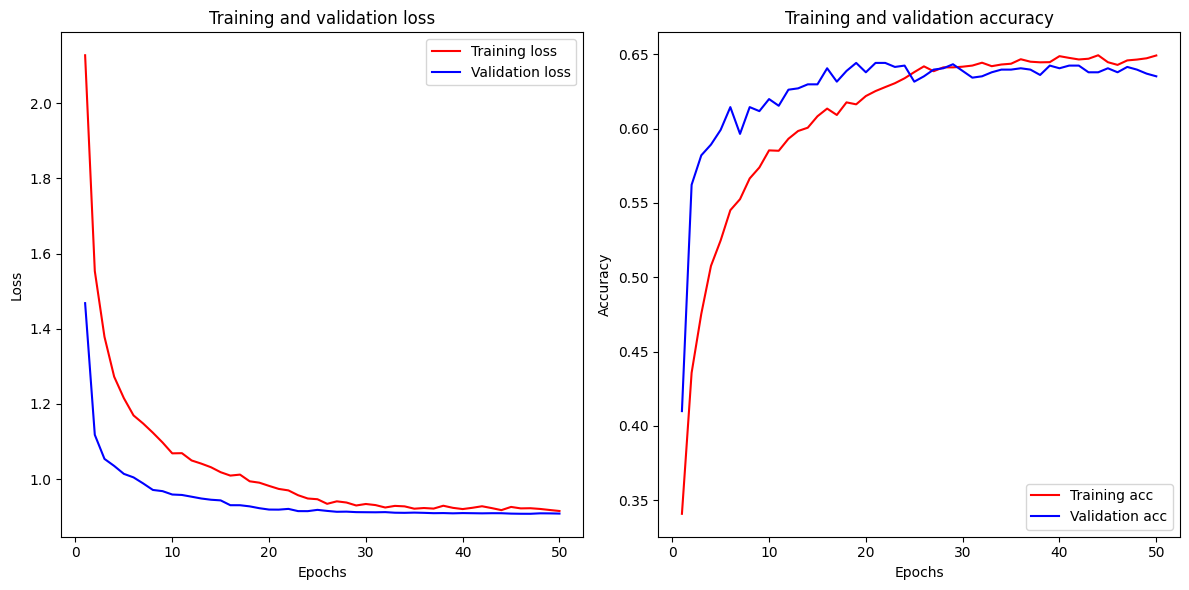

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


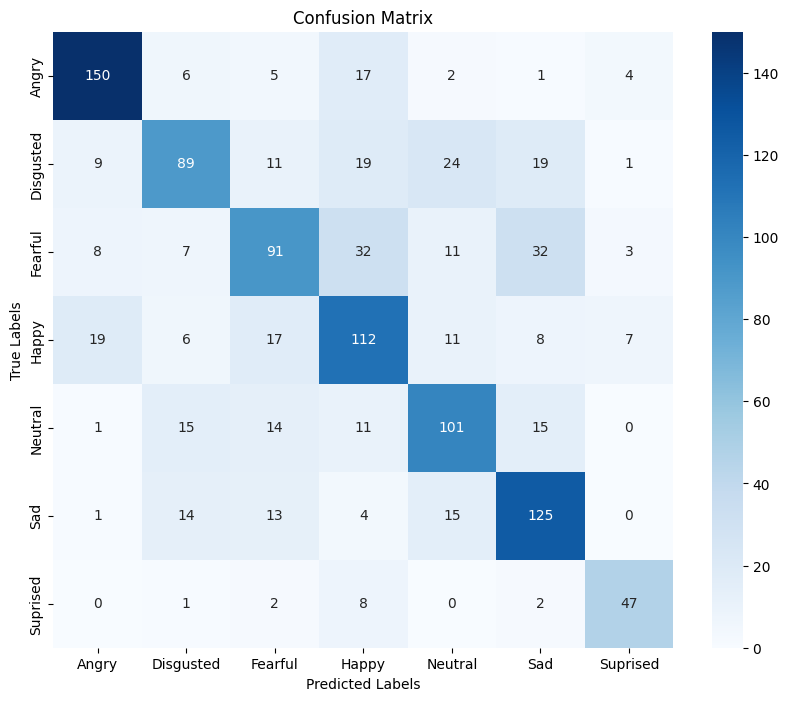

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


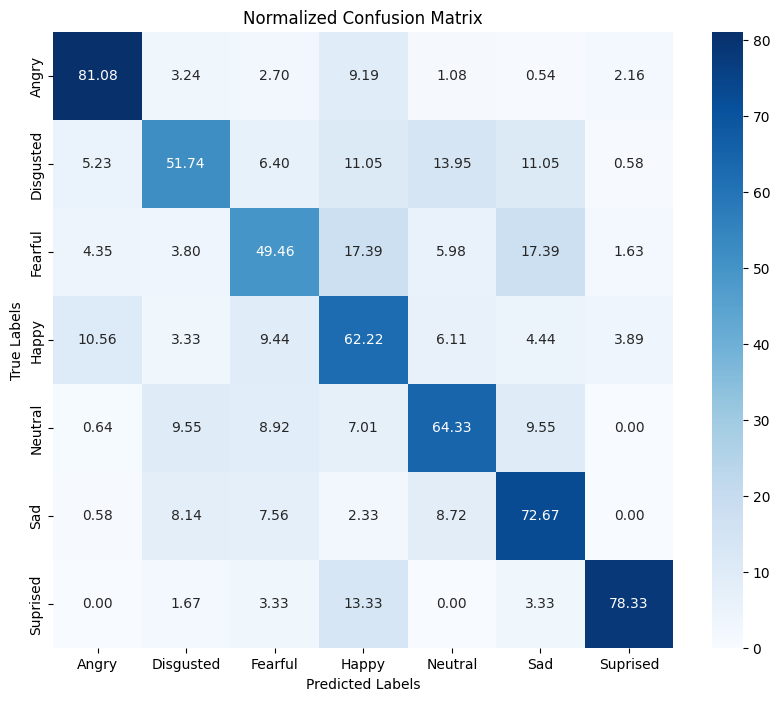

(<keras.src.callbacks.history.History at 0x2ad0f1668d0>,
 <Sequential name=sequential_8, built=True>)

In [24]:
n_mfcc = 13
case = 'E1.1'
train_and_evaluate_model(n_mfcc, Config, CnnModelUsingFeatureStatistics, patience_early_stop=5, patience_lr_reduction=3, batch_size=64, case = 'E1.1', learning_rate=0.0004, key = 'mfcc')

**1.2. Với n_mfcc = 20**

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2024-06-22 11:17:52.337 | INFO     | keras.src.utils.summary_utils:print_summary:366 - Model: "sequential_9"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_36 (Conv1D)              │ (None, 220, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 220, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_37 (Conv1D)              │ (None, 220, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 220, 128)       │           512 │
│ (BatchNormalization)            │         

Epoch 1/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.2898 - loss: 2.5335 - val_accuracy: 0.4955 - val_loss: 1.3599 - learning_rate: 2.5000e-04
Epoch 2/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.4481 - loss: 1.6260 - val_accuracy: 0.5937 - val_loss: 1.1223 - learning_rate: 2.5000e-04
Epoch 3/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.4950 - loss: 1.3878 - val_accuracy: 0.6036 - val_loss: 1.0578 - learning_rate: 2.5000e-04
Epoch 4/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.5213 - loss: 1.2915 - val_accuracy: 0.6135 - val_loss: 1.0185 - learning_rate: 2.5000e-04
Epoch 5/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.5387 - loss: 1.2128 - val_accuracy: 0.6135 - val_loss: 0.9937 - learning_rate: 2.5000e-04
Epoch 6/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.5639 - loss: 1.1468 - val_accuracy: 0.6144 - val_loss: 0.9728 - learning_rate: 2.5000e-04
Epoch 7/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/ste

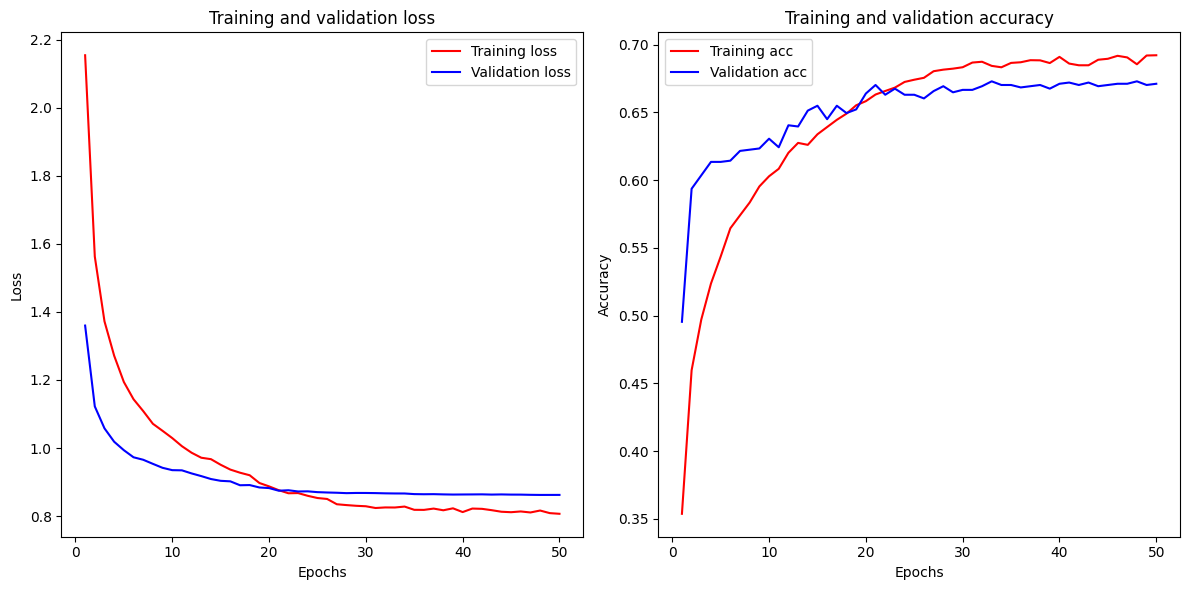

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


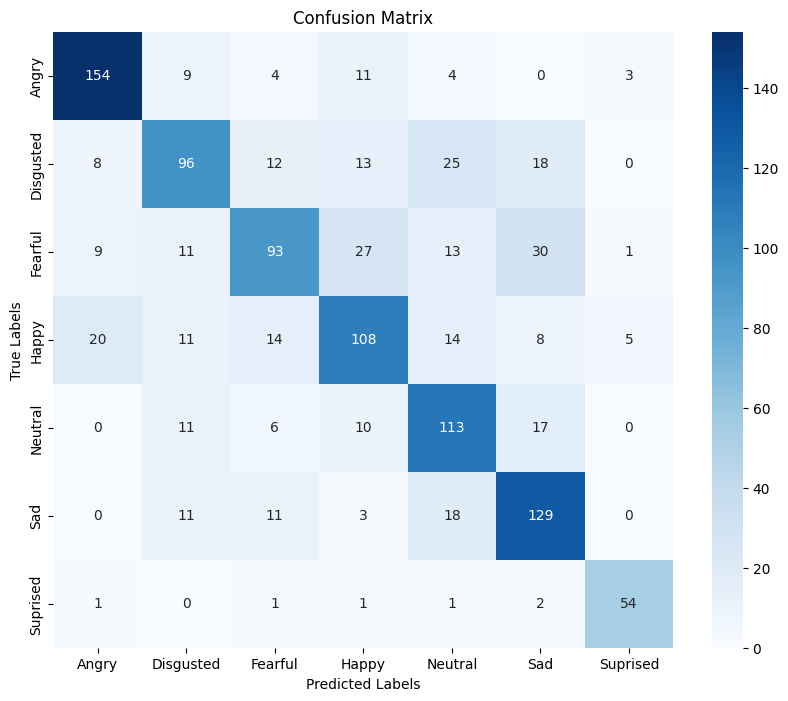

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


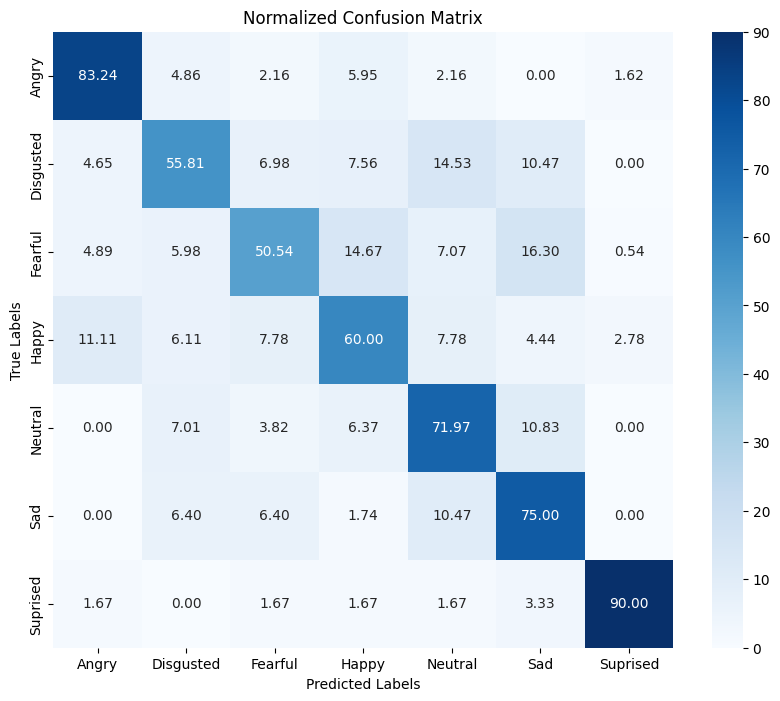

In [25]:
n_mfcc = 20
case = 'E1.2'
history, model = train_and_evaluate_model(n_mfcc, Config, CnnModelUsingFeatureStatistics, patience_early_stop=5, patience_lr_reduction=3, batch_size=64, learning_rate=0.00025, case=case, key = 'mfcc')

**1.3. Với n_mfcc = 26**

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2024-06-22 12:49:18.024 | INFO     | keras.src.utils.summary_utils:print_summary:366 - Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 286, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 286, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 286, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 286, 128)       │           512 │
│ (BatchNormalization)            │           

Epoch 1/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.2502 - loss: 2.6897 - val_accuracy: 0.4423 - val_loss: 1.4445 - learning_rate: 1.2000e-04
Epoch 2/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.4240 - loss: 1.7711 - val_accuracy: 0.5559 - val_loss: 1.1669 - learning_rate: 1.2000e-04
Epoch 3/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.4709 - loss: 1.5346 - val_accuracy: 0.5874 - val_loss: 1.0903 - learning_rate: 1.2000e-04
Epoch 4/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.5037 - loss: 1.3818 - val_accuracy: 0.5946 - val_loss: 1.0486 - learning_rate: 1.2000e-04
Epoch 5/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.5208 - loss: 1.2916 - val_accuracy: 0.6090 - val_loss: 1.0187 - learning_rate: 1.2000e-04
Epoch 6/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.5447 - loss: 1.2246 - val_accuracy: 0.6189 - val_loss: 0.9887 - learning_rate: 1.2000e-04
Epoch 7/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/ste

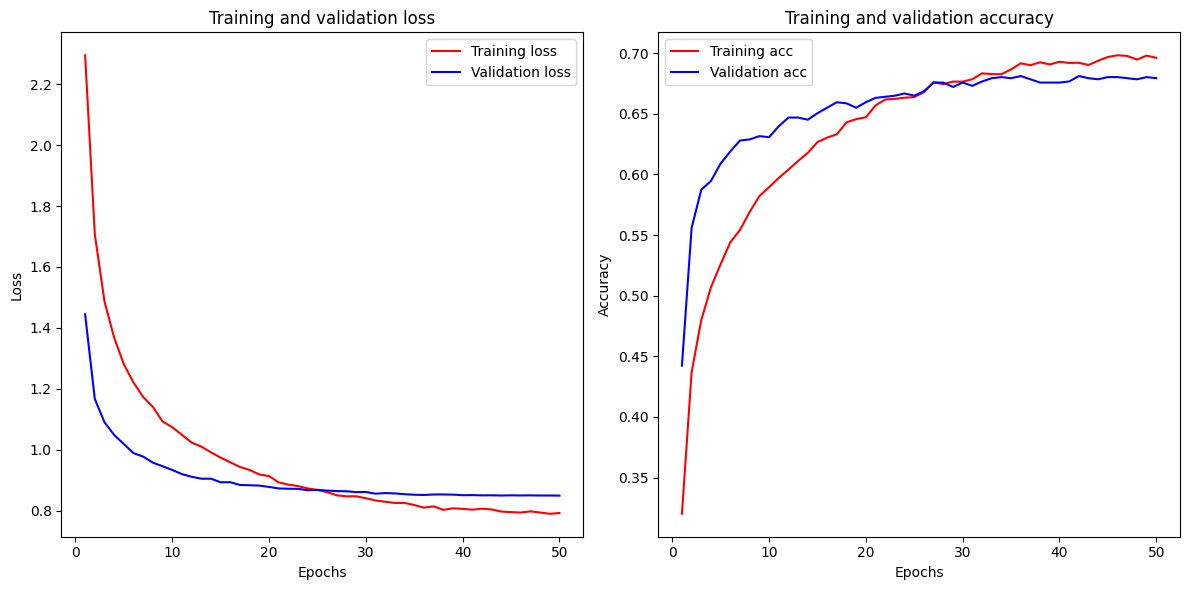

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


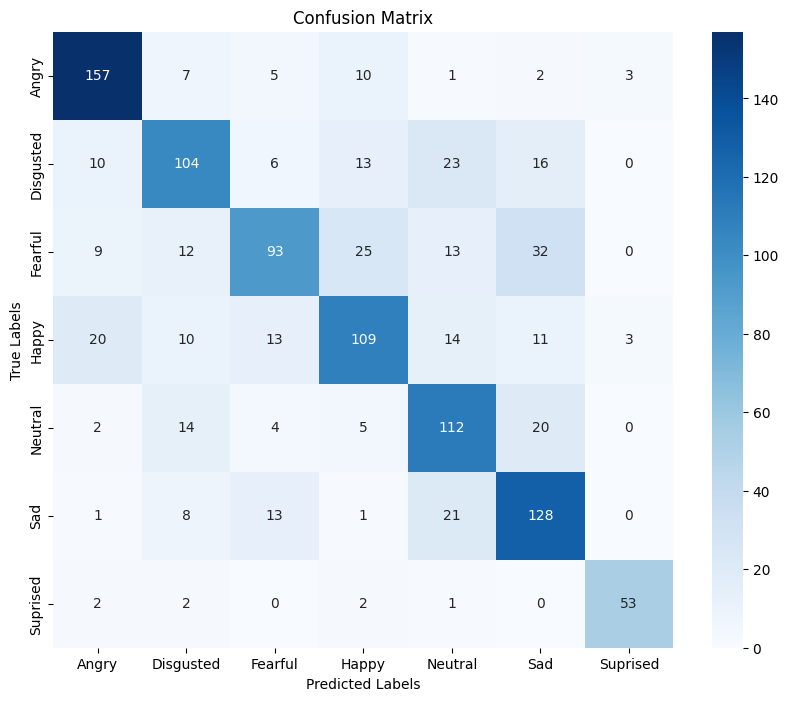

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


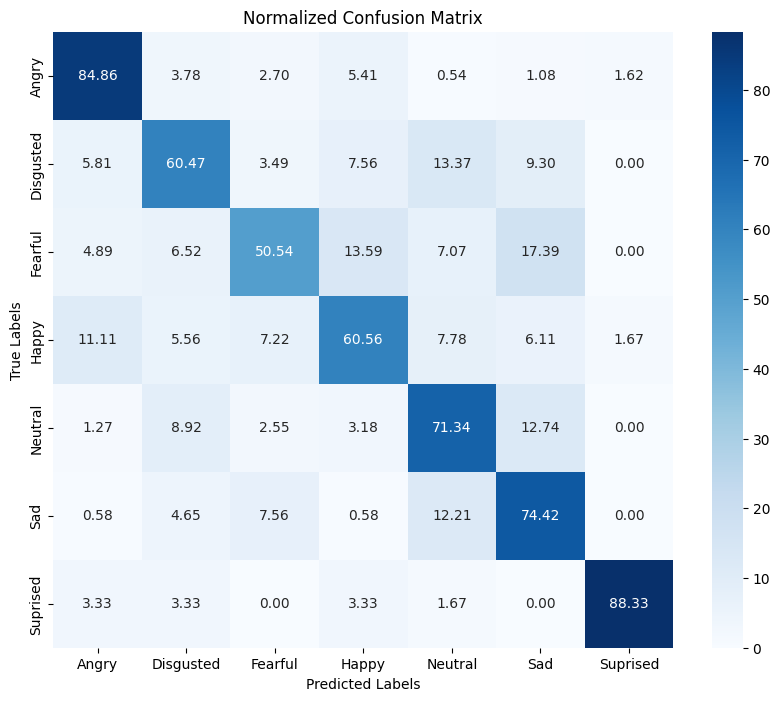

In [3]:
n_mfcc = 26
case = 'E1.3'
history, model = train_and_evaluate_model(n_mfcc, Config, CnnModelUsingFeatureStatistics, patience_early_stop=5, patience_lr_reduction=3, batch_size=64, learning_rate=0.00012, case=case, key = 'mfcc')

**1.4. Với n_mfcc = 40**

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2024-06-22 14:35:10.163 | INFO     | keras.src.utils.summary_utils:print_summary:366 - Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 440, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 440, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 440, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 440, 128)       │           512 │
│ (BatchNormalization)            │           

Epoch 1/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.2468 - loss: 2.6768 - val_accuracy: 0.4468 - val_loss: 1.3991 - learning_rate: 7.0000e-05
Epoch 2/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 33s 79ms/step - accuracy: 0.4192 - loss: 1.8132 - val_accuracy: 0.5432 - val_loss: 1.2069 - learning_rate: 7.0000e-05
Epoch 3/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 35s 84ms/step - accuracy: 0.4576 - loss: 1.5771 - val_accuracy: 0.5694 - val_loss: 1.1383 - learning_rate: 7.0000e-05
Epoch 4/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - accuracy: 0.4832 - loss: 1.4411 - val_accuracy: 0.5955 - val_loss: 1.0936 - learning_rate: 7.0000e-05
Epoch 5/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - accuracy: 0.5005 - loss: 1.3445 - val_accuracy: 0.6009 - val_loss: 1.0615 - learning_rate: 7.0000e-05
Epoch 6/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 30s 71ms/step - accuracy: 0.5261 - loss: 1.2550 - val_accuracy: 0.6018 - val_loss: 1.0379 - learning_rate: 7.0000e-05
Epoch 7/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/ste

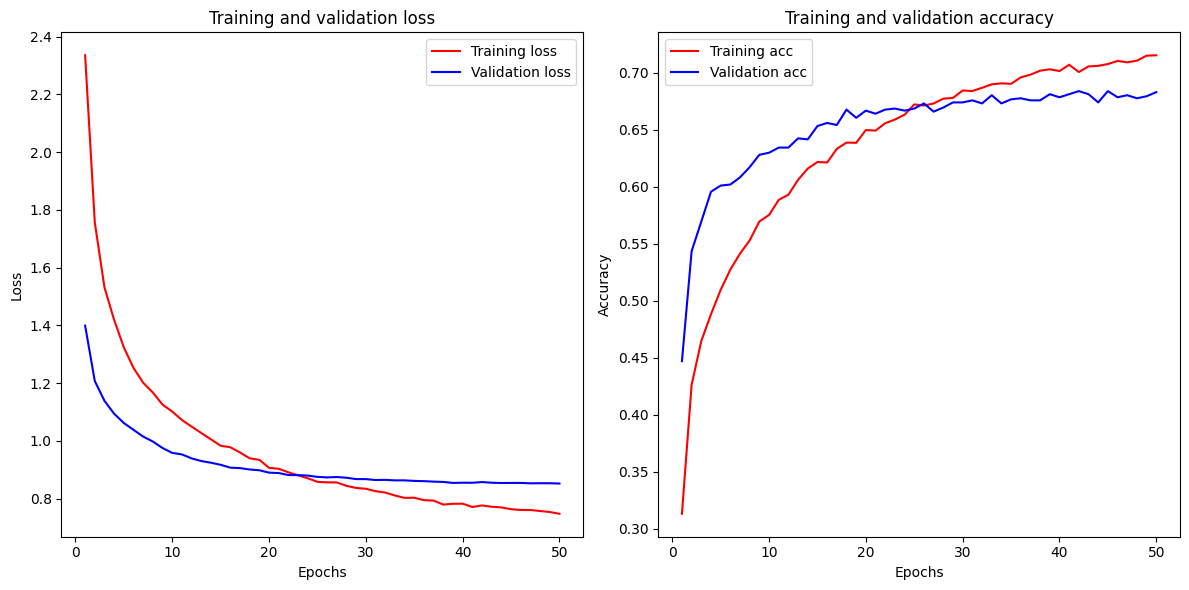

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


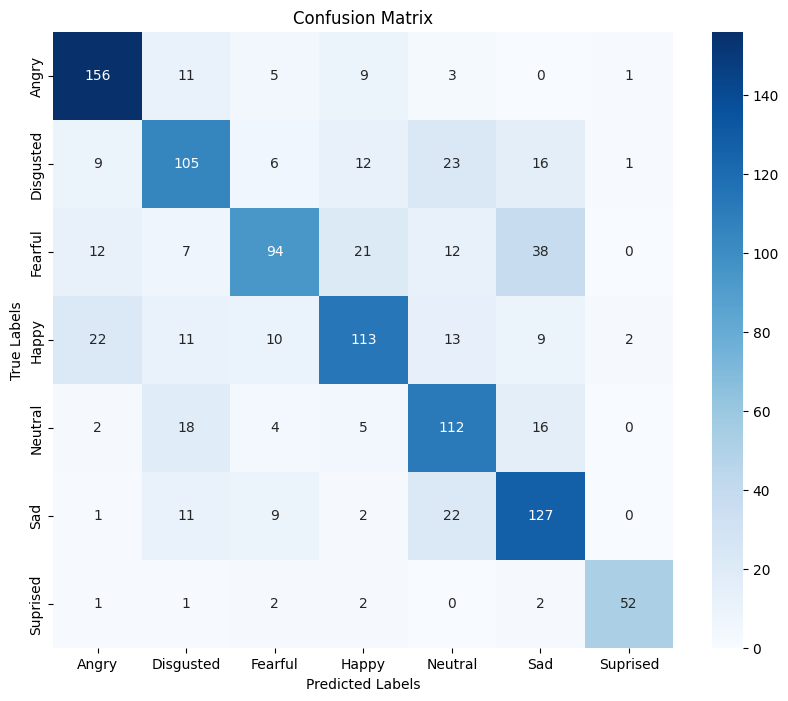

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


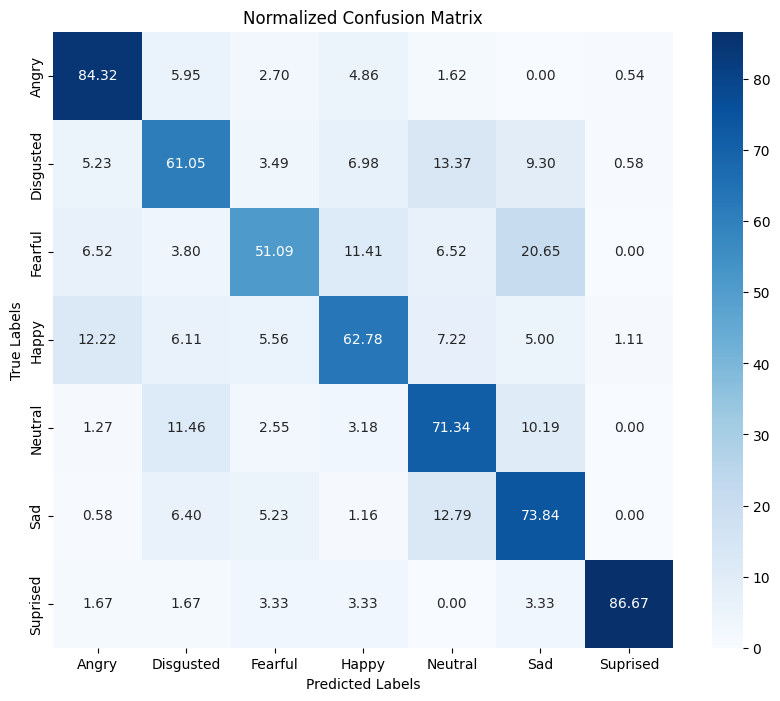

In [4]:
n_mfcc = 40
case = 'E1.4'
history, model = train_and_evaluate_model(n_mfcc, Config, CnnModelUsingFeatureStatistics, patience_early_stop=5, patience_lr_reduction=3, batch_size=64, learning_rate=0.00007, case = case, key = 'mfcc')

# Thử nghiệm trường hợp 2: chỉ ZCR

In [5]:
import os
import psutil

# Function to limit CPU usage
def limit_cpu_usage(percentage):
    p = psutil.Process(os.getpid())
    # Get the number of available CPUs
    num_cpus = os.cpu_count()
    # Calculate the number of CPUs to use based on the percentage
    cpus_to_use = int(num_cpus * percentage / 100)
    # Set CPU affinity to the calculated number of CPUs
    p.cpu_affinity(list(range(cpus_to_use)))

# Limit CPU usage to 70%
limit_cpu_usage(30)

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2024-06-22 15:08:58.416 | INFO     | keras.src.utils.summary_utils:print_summary:366 - Model: "sequential_2"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 8, 128)         │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 8, 128)         │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 128)         │           512 │
│ (BatchNormalization)            │         

Epoch 1/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1825 - loss: 2.7268 - val_accuracy: 0.2234 - val_loss: 1.8464 - learning_rate: 0.0010
Epoch 2/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2273 - loss: 1.9327 - val_accuracy: 0.3045 - val_loss: 1.7124 - learning_rate: 0.0010
Epoch 3/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2522 - loss: 1.8217 - val_accuracy: 0.3297 - val_loss: 1.7015 - learning_rate: 0.0010
Epoch 4/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2623 - loss: 1.7914 - val_accuracy: 0.3225 - val_loss: 1.6887 - learning_rate: 0.0010
Epoch 5/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2741 - loss: 1.7755 - val_accuracy: 0.3270 - val_loss: 1.6885 - learning_rate: 0.0010
Epoch 6/50
419/421 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2686 - loss: 1.7662
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2686 - loss: 1.7662 - v

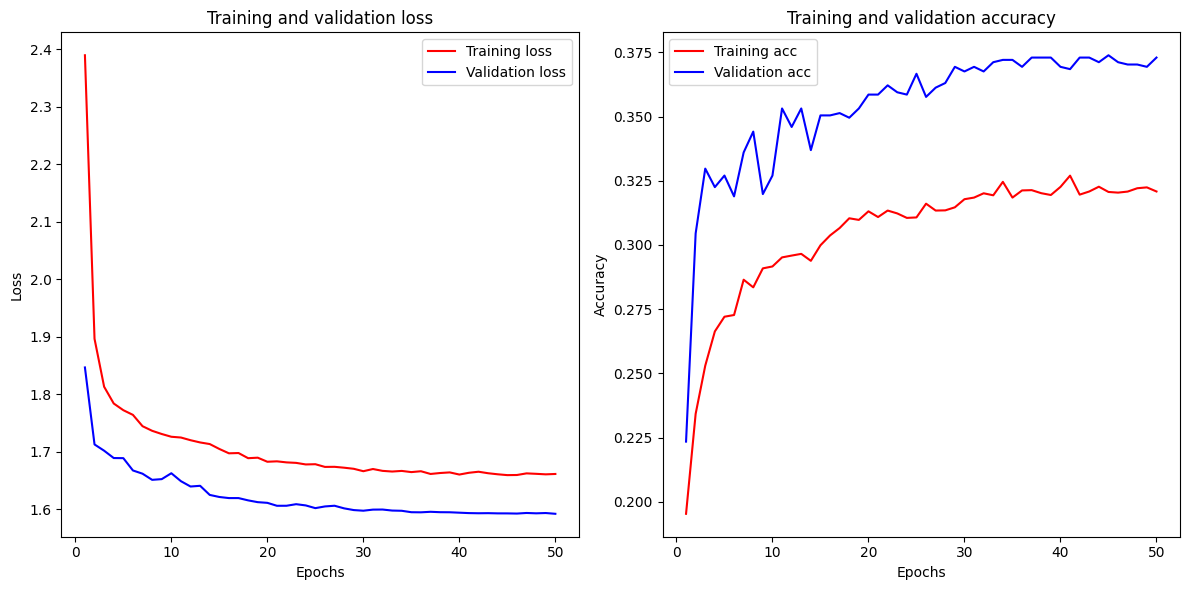

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


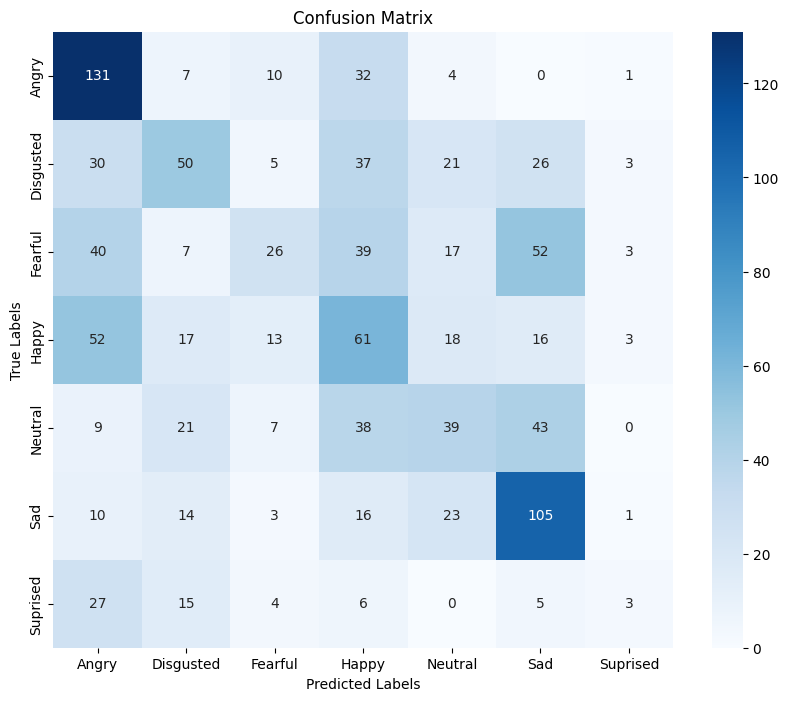

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


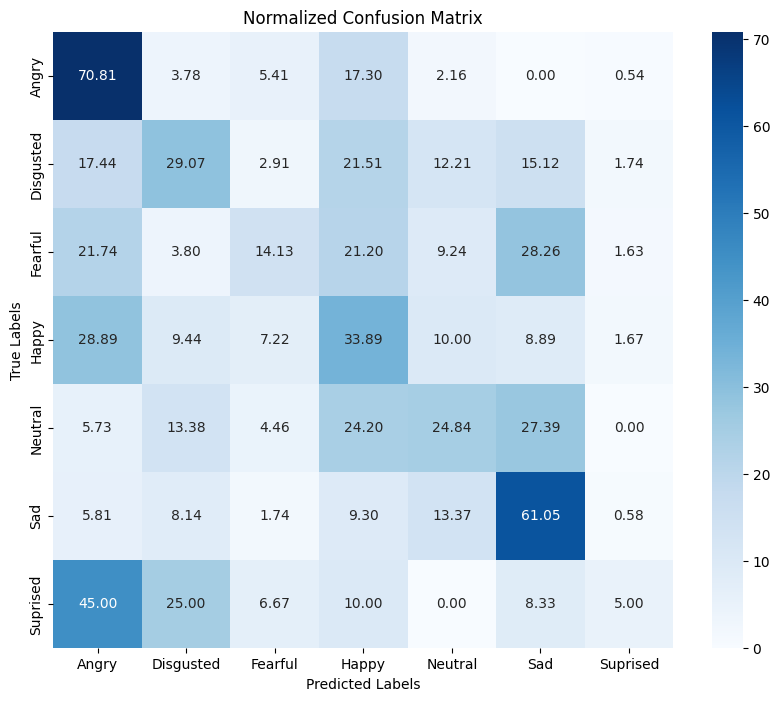

In [7]:
history, model = train_and_evaluate_model(n_mfcc, Config, CnnModelUsingFeatureStatistics, patience_early_stop=5, patience_lr_reduction=3, batch_size=64, learning_rate=0.001, case = 'E2', key = 'zcr')

# Thử nghiệm trường hợp 3: chỉ RMS

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2024-06-22 15:11:05.815 | INFO     | keras.src.utils.summary_utils:print_summary:366 - Model: "sequential_3"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 8, 128)         │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 8, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 8, 128)         │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 8, 128)         │           512 │
│ (BatchNormalization)            │         

Epoch 1/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2118 - loss: 2.6013 - val_accuracy: 0.2207 - val_loss: 1.8083 - learning_rate: 5.0000e-04
Epoch 2/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2663 - loss: 1.9189 - val_accuracy: 0.3405 - val_loss: 1.6662 - learning_rate: 5.0000e-04
Epoch 3/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2776 - loss: 1.7906 - val_accuracy: 0.3532 - val_loss: 1.6227 - learning_rate: 5.0000e-04
Epoch 4/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2969 - loss: 1.7101 - val_accuracy: 0.3649 - val_loss: 1.6023 - learning_rate: 5.0000e-04
Epoch 5/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3177 - loss: 1.6673 - val_accuracy: 0.3586 - val_loss: 1.5931 - learning_rate: 5.0000e-04
Epoch 6/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3333 - loss: 1.6391 - val_accuracy: 0.3811 - val_loss: 1.5478 - learning_rate: 5.0000e-04
Epoch 7/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 

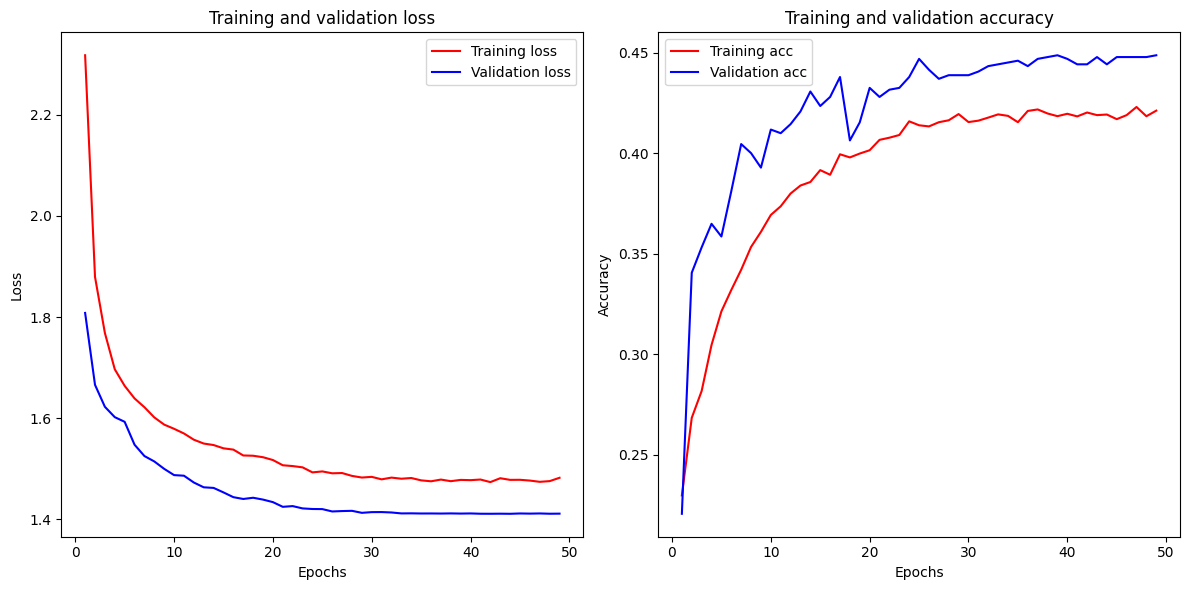

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


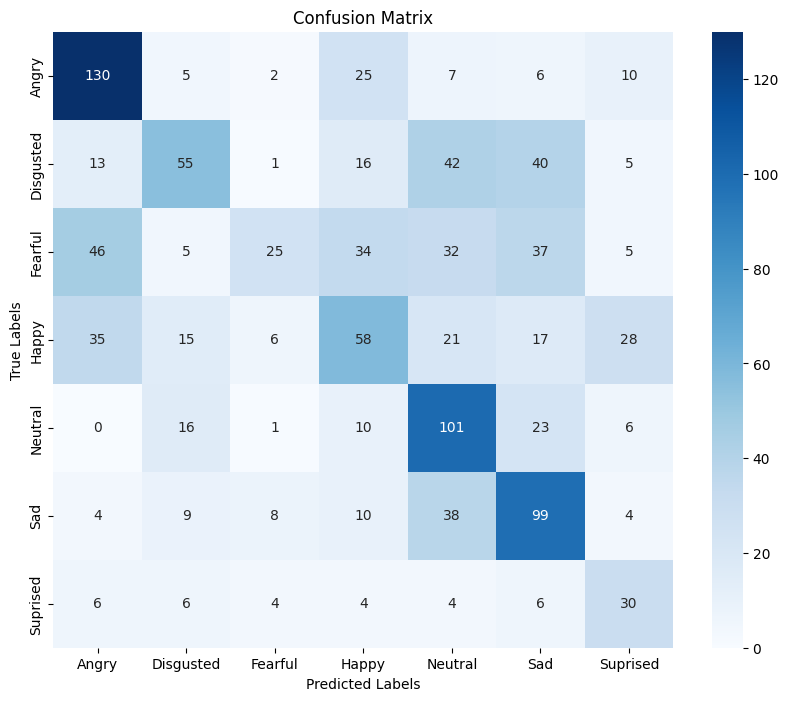

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


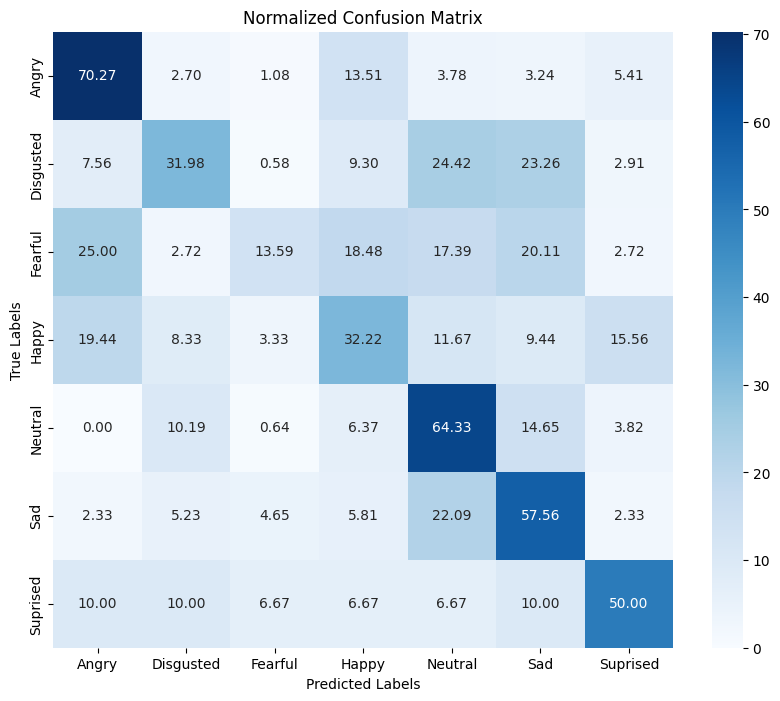

In [9]:
history, model = train_and_evaluate_model(n_mfcc, Config, CnnModelUsingFeatureStatistics, patience_early_stop=5, patience_lr_reduction=3, batch_size=64, learning_rate=0.0005, case = 'E3', key = 'rms')

# Thử nghiệm trường hợp 4: chỉ Pitch

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2024-06-23 05:37:54.455 | INFO     | keras.src.utils.summary_utils:print_summary:366 - Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 8, 128)         │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 8, 128)         │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 128)         │           512 │
│ (BatchNormalization)            │           

Epoch 1/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1898 - loss: 2.7671 - val_accuracy: 0.2757 - val_loss: 1.7819 - learning_rate: 5.0000e-04
Epoch 2/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2595 - loss: 2.0048 - val_accuracy: 0.3505 - val_loss: 1.6735 - learning_rate: 5.0000e-04
Epoch 3/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2919 - loss: 1.8157 - val_accuracy: 0.3495 - val_loss: 1.6336 - learning_rate: 5.0000e-04
Epoch 4/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3116 - loss: 1.7356 - val_accuracy: 0.3775 - val_loss: 1.5916 - learning_rate: 5.0000e-04
Epoch 5/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3302 - loss: 1.6816 - val_accuracy: 0.3892 - val_loss: 1.5735 - learning_rate: 5.0000e-04
Epoch 6/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3437 - loss: 1.6444 - val_accuracy: 0.3784 - val_loss: 1.5609 - learning_rate: 5.0000e-04
Epoch 7/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 

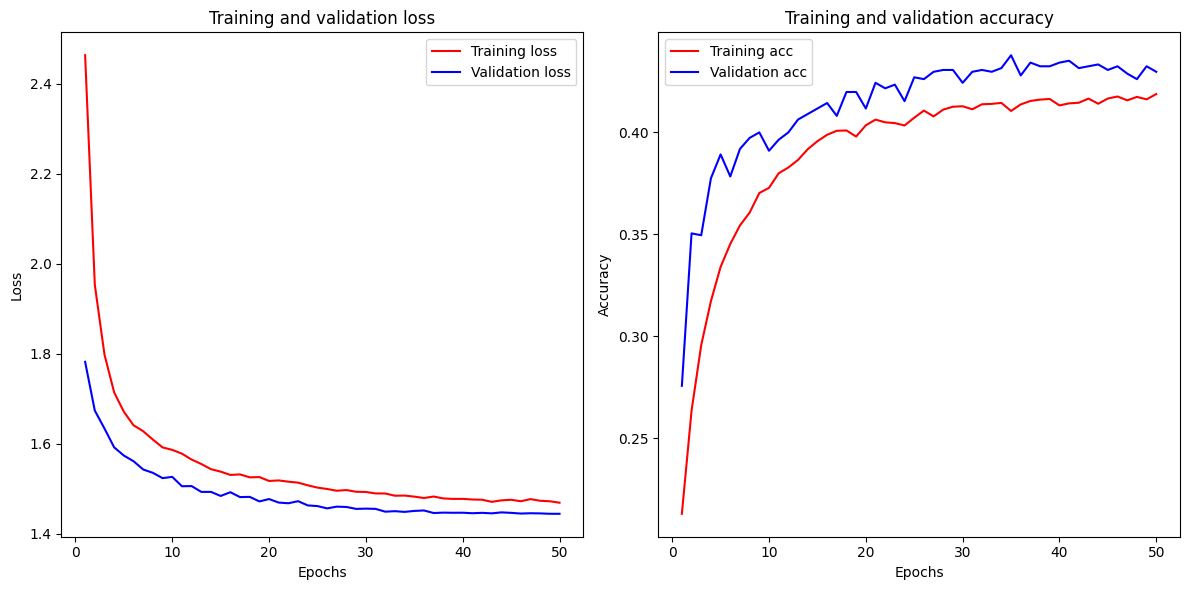

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


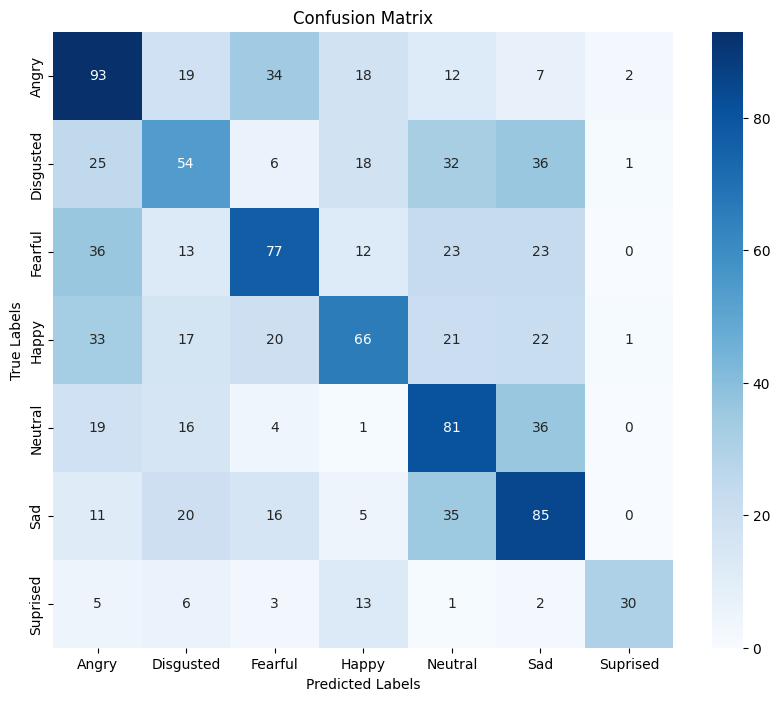

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


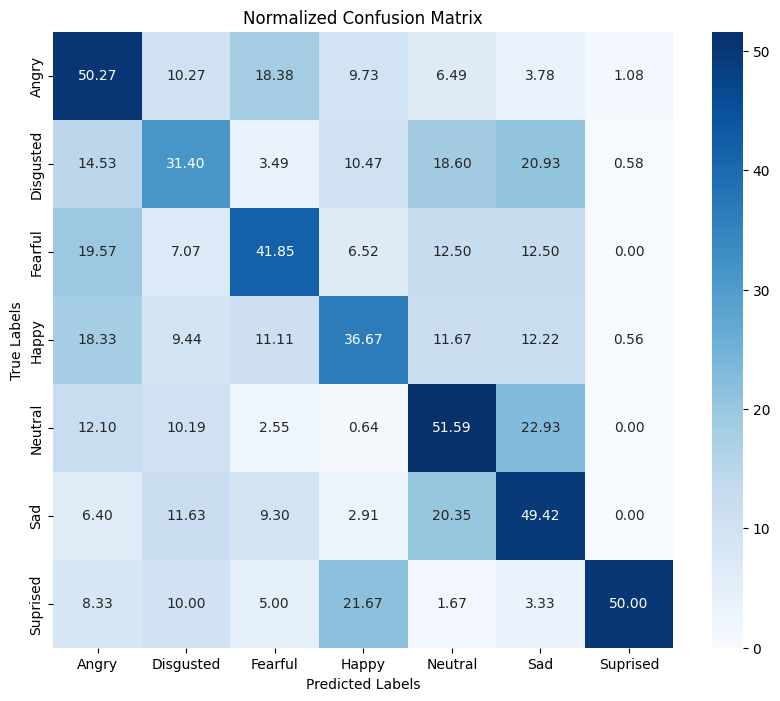

In [7]:
n_mfcc = 13
history, model = train_and_evaluate_model(n_mfcc, Config, CnnModelUsingFeatureStatistics, patience_early_stop=5, patience_lr_reduction=3, batch_size=64, learning_rate=0.0005, case = 'E4', key = 'pitch')

# Thử nghiệm trường hợp 5: tất cả các đặc trưng

**5.1. Với n_mfcc = 13**

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2024-06-20 02:03:39.966 | INFO     | keras.src.utils.summary_utils:print_summary:366 - Model: "sequential_7"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_28 (Conv1D)              │ (None, 167, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 167, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_29 (Conv1D)              │ (None, 167, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 167, 128)       │           512 │
│ (BatchNormalization)            │         

Epoch 1/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.2873 - loss: 2.4585 - val_accuracy: 0.4324 - val_loss: 1.4121 - learning_rate: 3.0000e-04
Epoch 2/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.4430 - loss: 1.6258 - val_accuracy: 0.5775 - val_loss: 1.1032 - learning_rate: 3.0000e-04
Epoch 3/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.4848 - loss: 1.3919 - val_accuracy: 0.5964 - val_loss: 1.0359 - learning_rate: 3.0000e-04
Epoch 4/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5182 - loss: 1.2796 - val_accuracy: 0.6099 - val_loss: 1.0047 - learning_rate: 3.0000e-04
Epoch 5/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5369 - loss: 1.2046 - val_accuracy: 0.6162 - val_loss: 0.9713 - learning_rate: 3.0000e-04
Epoch 6/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5587 - loss: 1.1372 - val_accuracy: 0.6171 - val_loss: 0.9557 - learning_rate: 3.0000e-04
Epoch 7/50
415/415 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - ac

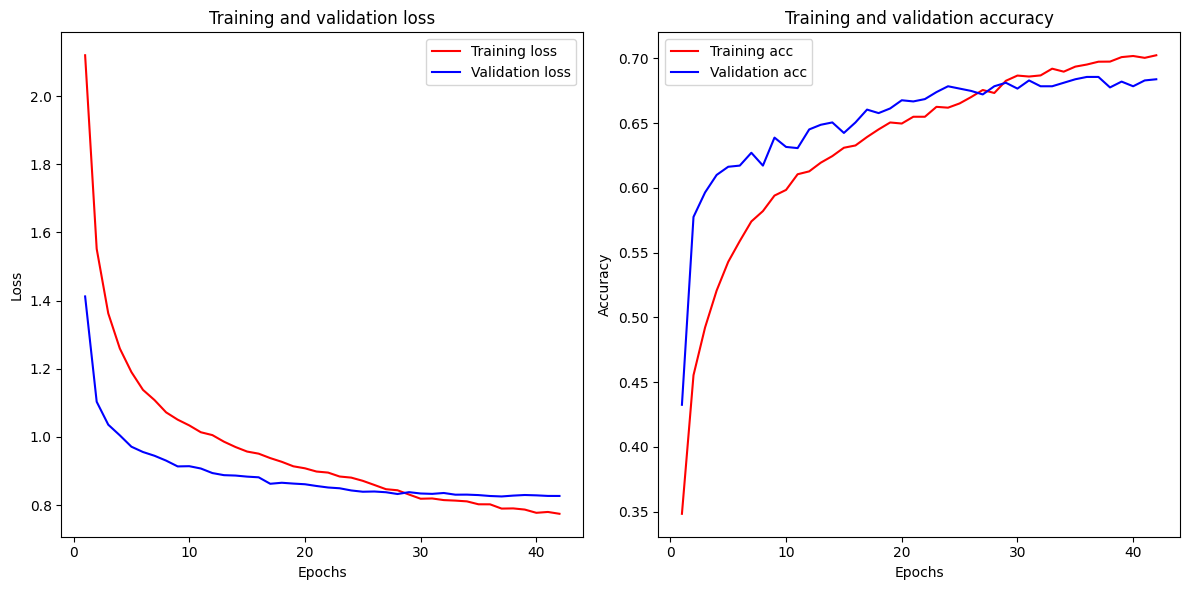

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


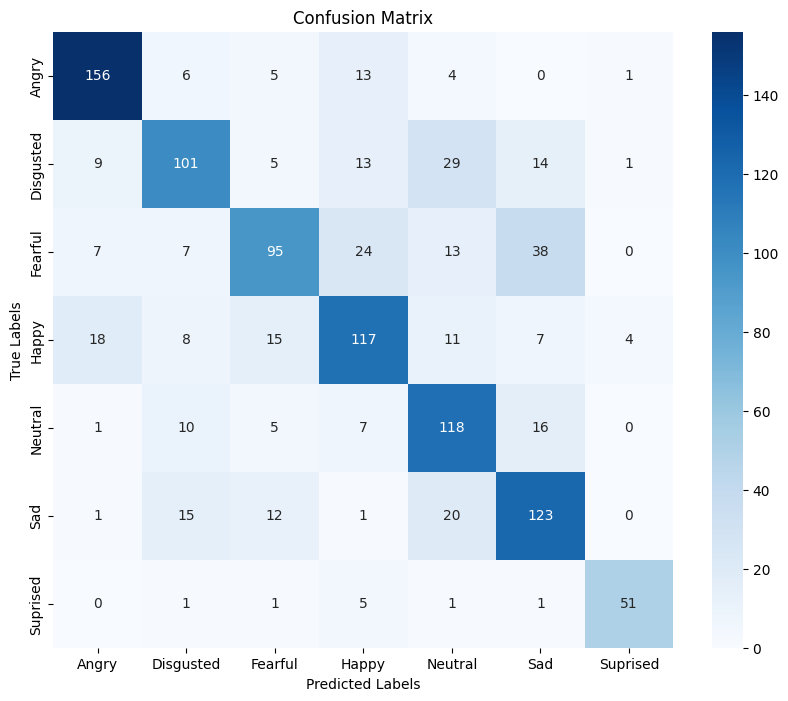

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


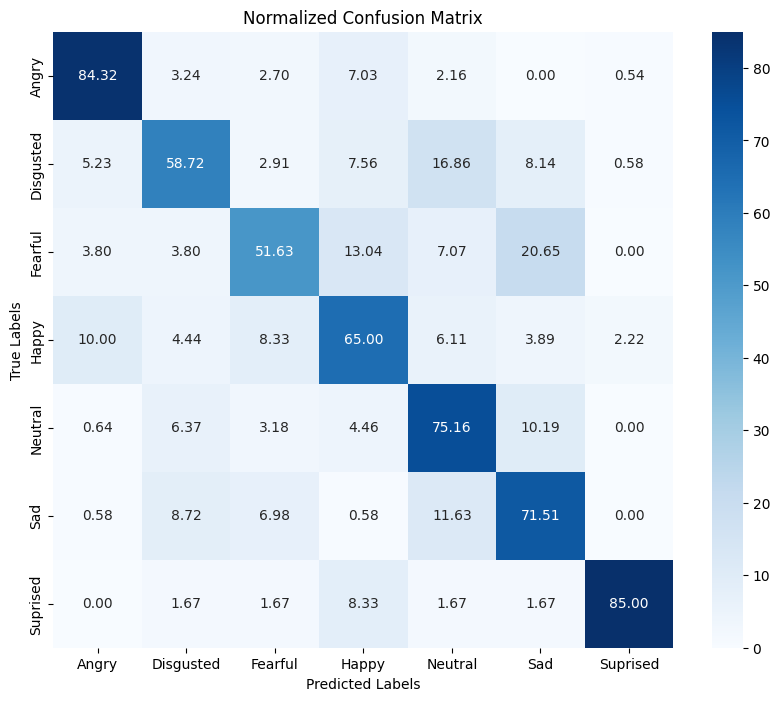

In [ ]:
n_mfcc = 13
history, model = train_and_evaluate_model(n_mfcc, Config, CnnModelUsingFeatureStatistics, patience_early_stop=5, patience_lr_reduction=3, batch_size=64, case = 'E5.1', learning_rate=0.0003)

**Với n_mfcc = 20**

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2024-06-20 04:16:29.678 | INFO     | keras.src.utils.summary_utils:print_summary:366 - Model: "sequential_3"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 244, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 244, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 244, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 244, 128)       │           512 │
│ (BatchNormalization)            │         

Epoch 1/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.2304 - loss: 2.8301 - val_accuracy: 0.4333 - val_loss: 1.5065 - learning_rate: 1.0000e-04
Epoch 2/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.3965 - loss: 1.9308 - val_accuracy: 0.5757 - val_loss: 1.1846 - learning_rate: 1.0000e-04
Epoch 3/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.4465 - loss: 1.6507 - val_accuracy: 0.5766 - val_loss: 1.1281 - learning_rate: 1.0000e-04
Epoch 4/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.4724 - loss: 1.5218 - val_accuracy: 0.5784 - val_loss: 1.0849 - learning_rate: 1.0000e-04
Epoch 5/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.4980 - loss: 1.4079 - val_accuracy: 0.5847 - val_loss: 1.0625 - learning_rate: 1.0000e-04
Epoch 6/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.5172 - loss: 1.3405 - val_accuracy: 0.5892 - val_loss: 1.0266 - learning_rate: 1.0000e-04
Epoch 7/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/ste

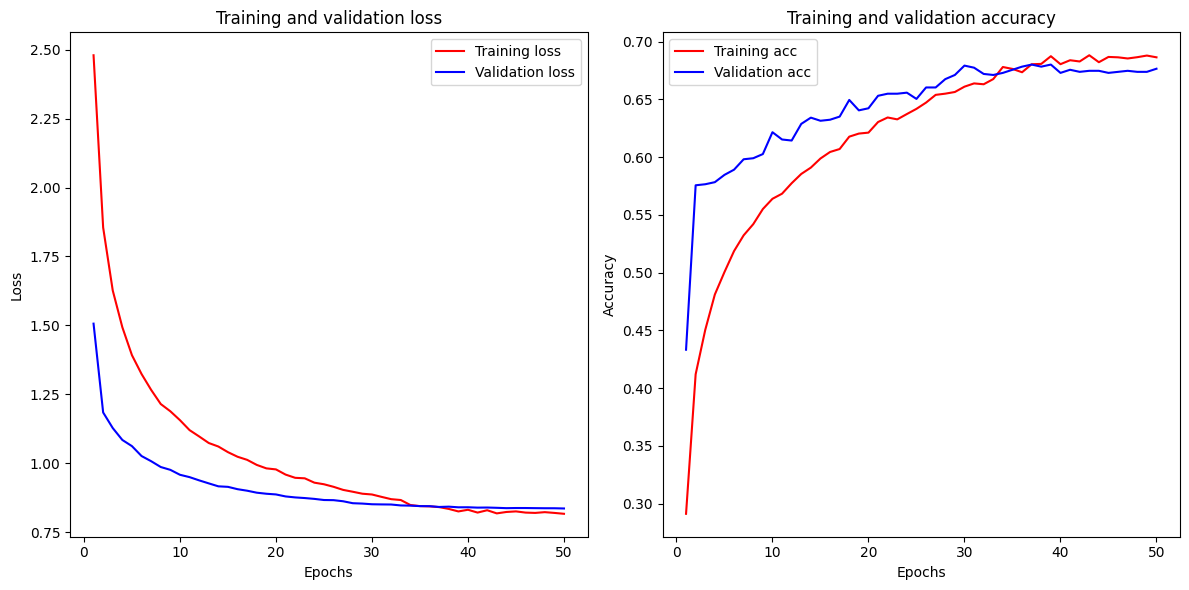

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


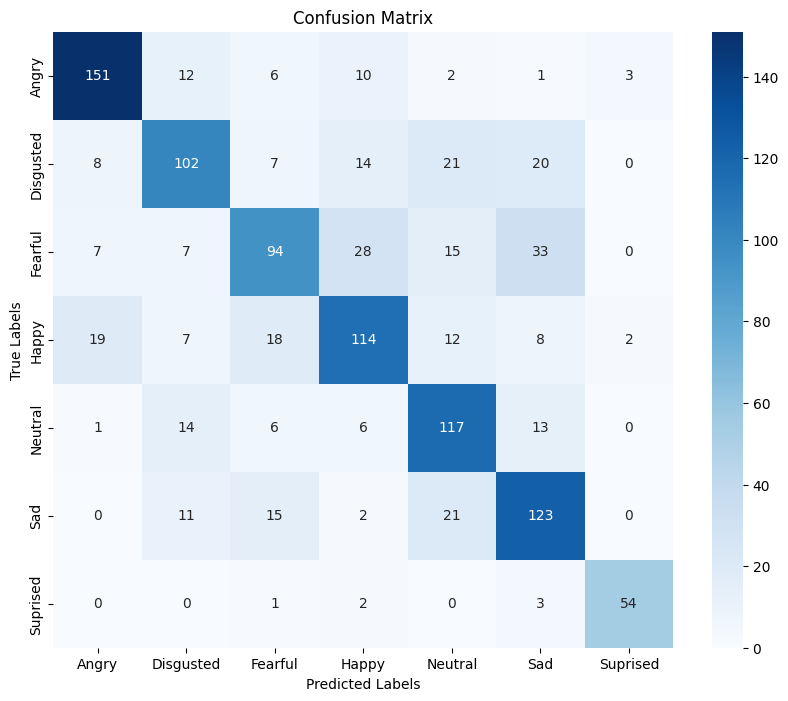

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


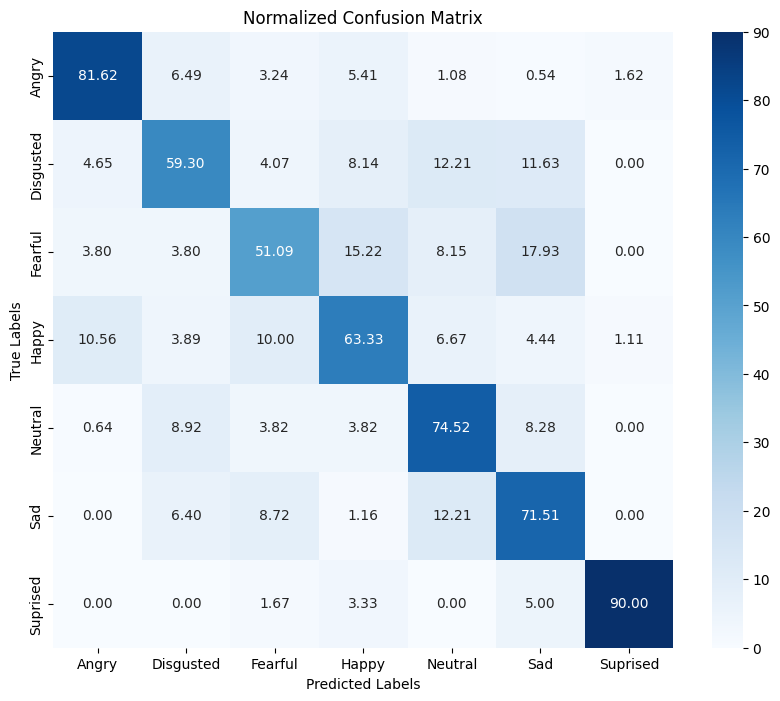

In [ ]:
n_mfcc = 20
history, model = train_and_evaluate_model(n_mfcc, Config, CnnModelUsingFeatureStatistics, patience_early_stop=5, patience_lr_reduction=3, batch_size=64, case = 'E5.2', learning_rate=0.0002)

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2024-06-22 15:49:11.206 | INFO     | keras.src.utils.summary_utils:print_summary:366 - Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 307, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 307, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 307, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 307, 128)       │           512 │
│ (BatchNormalization)            │           

Epoch 1/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.2817 - loss: 2.5269 - val_accuracy: 0.4468 - val_loss: 1.4105 - learning_rate: 1.5000e-04
Epoch 2/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.4442 - loss: 1.6620 - val_accuracy: 0.5865 - val_loss: 1.1038 - learning_rate: 1.5000e-04
Epoch 3/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.4955 - loss: 1.4286 - val_accuracy: 0.6045 - val_loss: 1.0418 - learning_rate: 1.5000e-04
Epoch 4/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.5295 - loss: 1.2907 - val_accuracy: 0.6189 - val_loss: 1.0004 - learning_rate: 1.5000e-04
Epoch 5/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.5413 - loss: 1.2263 - val_accuracy: 0.6315 - val_loss: 0.9570 - learning_rate: 1.5000e-04
Epoch 6/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.5614 - loss: 1.1505 - val_accuracy: 0.6306 - val_loss: 0.9491 - learning_rate: 1.5000e-04
Epoch 7/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/ste

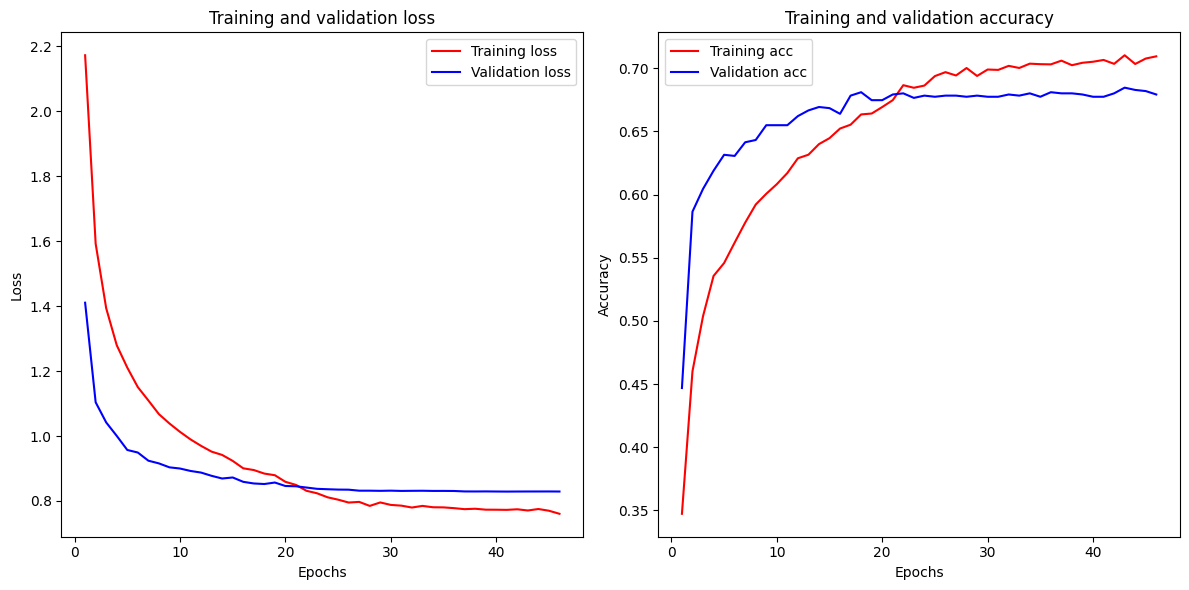

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


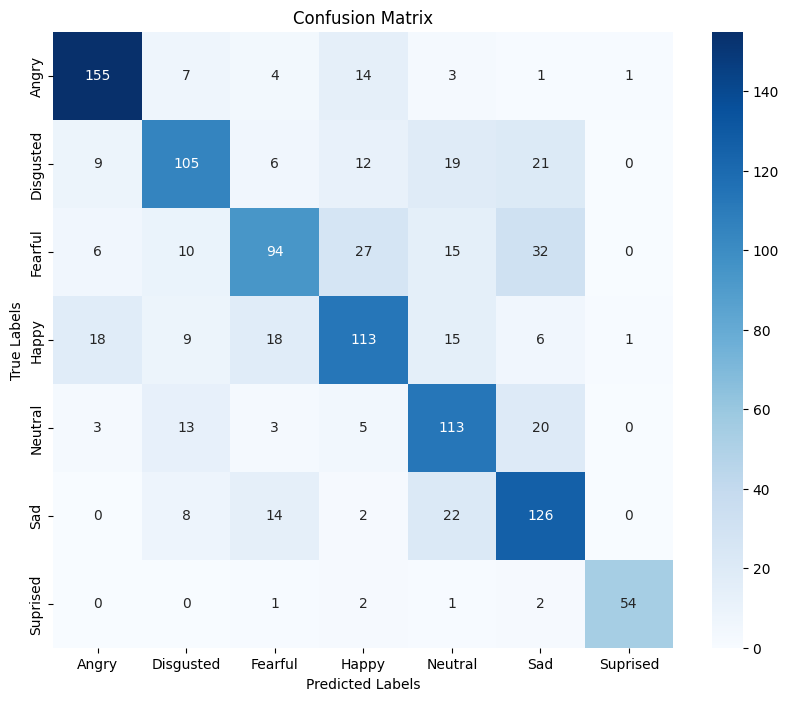

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


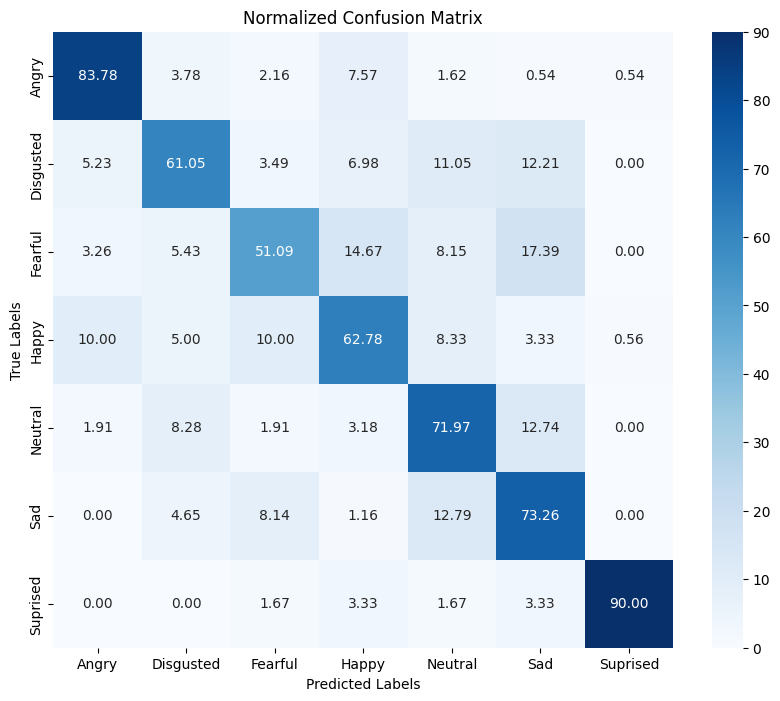

In [5]:
n_mfcc = 26
history, model = train_and_evaluate_model(n_mfcc, Config, CnnModelUsingFeatureStatistics, patience_early_stop=5, patience_lr_reduction=3, batch_size=64, case = 'E5.3', learning_rate=0.00012)

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2024-06-20 02:32:51.059 | INFO     | keras.src.utils.summary_utils:print_summary:366 - Model: "sequential_10"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_40 (Conv1D)              │ (None, 464, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 464, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_41 (Conv1D)              │ (None, 464, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 464, 128)       │           512 │
│ (BatchNormalization)            │        

Epoch 1/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - accuracy: 0.2852 - loss: 2.5547 - val_accuracy: 0.4802 - val_loss: 1.3381 - learning_rate: 1.0000e-04
Epoch 2/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.4508 - loss: 1.6289 - val_accuracy: 0.5712 - val_loss: 1.1199 - learning_rate: 1.0000e-04
Epoch 3/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.4925 - loss: 1.4311 - val_accuracy: 0.6036 - val_loss: 1.0542 - learning_rate: 1.0000e-04
Epoch 4/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 26s 63ms/step - accuracy: 0.5244 - loss: 1.2928 - val_accuracy: 0.6198 - val_loss: 1.0136 - learning_rate: 1.0000e-04
Epoch 5/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.5359 - loss: 1.2260 - val_accuracy: 0.6252 - val_loss: 0.9839 - learning_rate: 1.0000e-04
Epoch 6/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.5653 - loss: 1.1432 - val_accuracy: 0.6414 - val_loss: 0.9610 - learning_rate: 1.0000e-04
Epoch 7/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/ste

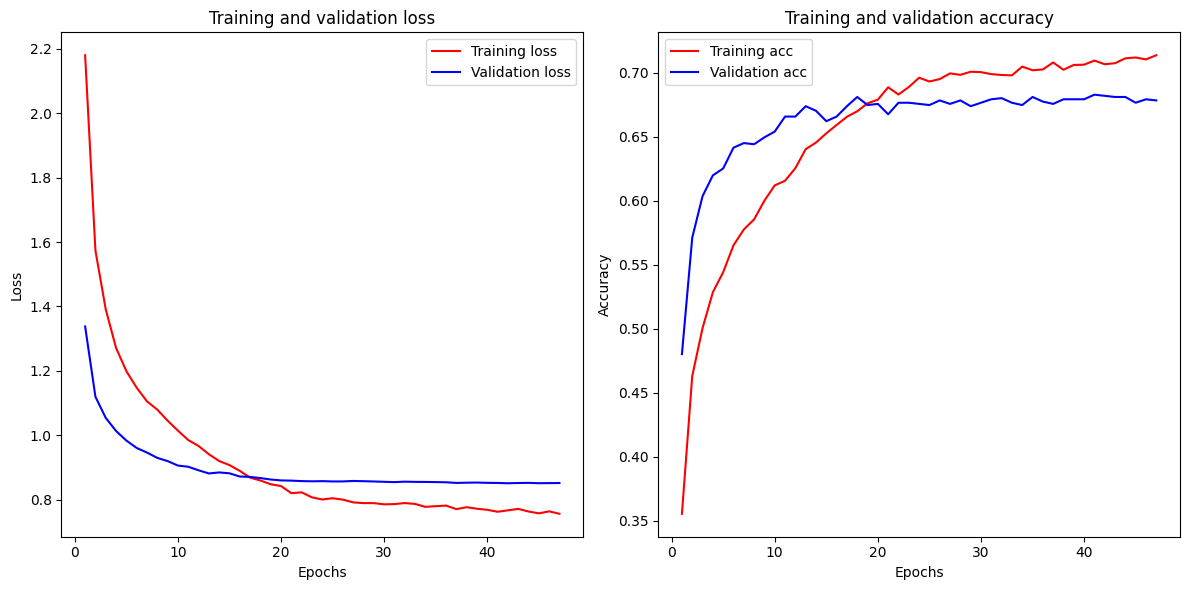

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


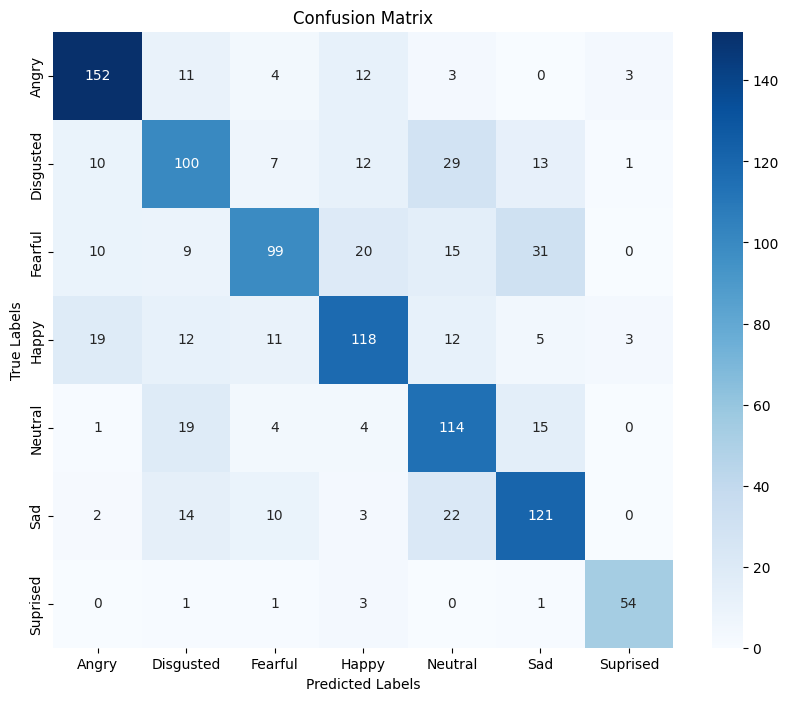

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


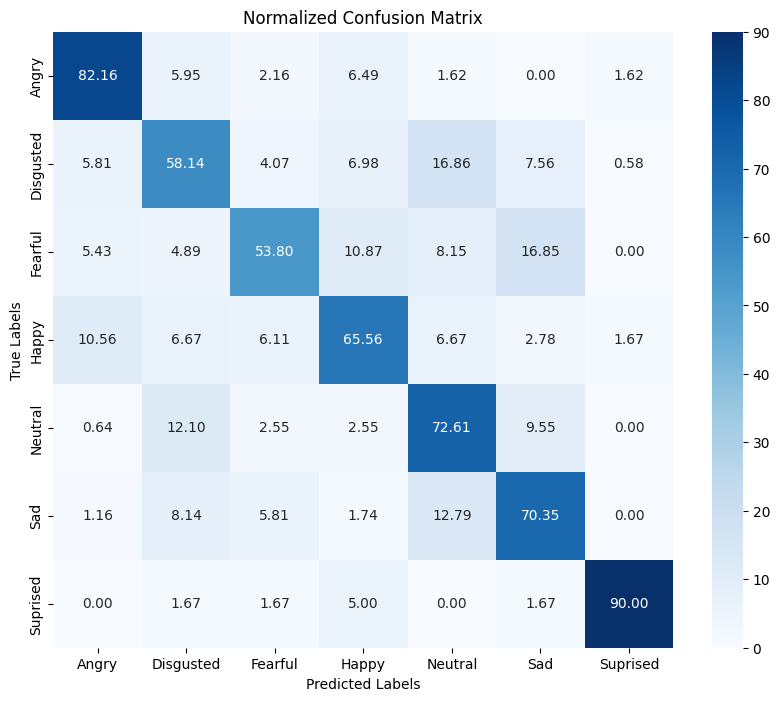

In [ ]:
n_mfcc = 40
history, model = train_and_evaluate_model(n_mfcc, Config, CnnModelUsingFeatureStatistics, patience_early_stop=5, patience_lr_reduction=3, batch_size=64, case = 'E5.4', learning_rate=0.0001)